In [2]:
import pandas as pd
import sqlite3

In [3]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [4]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
conn=sqlite3.connect("telco_churn.db")

In [10]:
df.to_sql("customers", conn, if_exists="replace", index=False)
print(pd.read_sql("SELECT * FROM customers LIMIT 5;", conn))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [11]:
# Total Customers
query1="SELECT COUNT(*) as total_customers FROM customers;"
df1=pd.read_sql(query1,conn)
print(df1)

   total_customers
0             7043


In [12]:
# How many senior citizens?
query2="SELECT SeniorCitizen, COUNT(*) as senior_count FROM customers GROUP BY SeniorCitizen"
df2=pd.read_sql(query2,conn)
print(df2)

   SeniorCitizen  senior_count
0              0          5901
1              1          1142


In [13]:
# Average Montly Charges by InternetService
query3="SELECT InternetService, ROUND(AVG(MonthlyCharges),2) as average_montly_charges FROM customers GROUP BY InternetService;"
df3=pd.read_sql(query3,conn)
print(df3)

  InternetService  average_montly_charges
0             DSL                   58.10
1     Fiber optic                   91.50
2              No                   21.08


In [14]:
# Which has the Highest Churn for Contract Type?
query4 = """
SELECT 
    Contract,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(
        100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*), 
        2
    ) AS churn_rate_percent
FROM customers
GROUP BY Contract;
"""
df4=pd.read_sql(query4, conn)
print(df4)

         Contract  total_customers  churned_customers  churn_rate_percent
0  Month-to-month             3875               1655               42.71
1        One year             1473                166               11.27
2        Two year             1695                 48                2.83


In [15]:
# Does Senior Citizen has the Highest Churn?
query5="""
SELECT
    SeniorCitizen,
    COUNT(*) AS total,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned,
    ROUND(
        100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*), 
        2
    ) AS churn_rate
FROM customers
GROUP BY SeniorCitizen;
"""
df5=pd.read_sql(query5, conn)
print(df5)

   SeniorCitizen  total  churned  churn_rate
0              0   5901     1393       23.61
1              1   1142      476       41.68


In [16]:
# Which InternetService has the highest churn?
query6="""
SELECT
    InternetService,
    COUNT(*) AS total,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned,
    ROUND(
        100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*), 
        2
    ) AS churn_rate
FROM customers
GROUP BY InternetService;
"""
df6=pd.read_sql(query6, conn)
print(df6)

  InternetService  total  churned  churn_rate
0             DSL   2421      459       18.96
1     Fiber optic   3096     1297       41.89
2              No   1526      113        7.40


In [17]:
# Do customers with dependents churn high?
query7="""
SELECT
    Dependents,
    COUNT(*) AS total,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned,
    ROUND(
        100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*), 
        2
    ) AS churn_rate
FROM customers
GROUP BY Dependents;
"""
df7=pd.read_sql(query7, conn)
print(df7)

  Dependents  total  churned  churn_rate
0         No   4933     1543       31.28
1        Yes   2110      326       15.45


In [18]:
# Which gender has the highest churn (Men or Women)?
query8="""
SELECT
    Gender,
    COUNT(*) AS total,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned,
    ROUND(
        100.0 * SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*), 
        2
    ) AS churn_rate
FROM customers
GROUP BY Gender;
"""
df8=pd.read_sql(query8, conn)
print(df8)

   gender  total  churned  churn_rate
0  Female   3488      939       26.92
1    Male   3555      930       26.16


In [19]:
# Revenue Lost for Contract Type
query9="""
SELECT
    Contract,
    SUM(CASE WHEN Churn='Yes' THEN MonthlyCharges ELSE 0 END) as revenue_lost
FROM customers
GROUP BY Contract;
"""
df9=pd.read_sql(query9,conn)
print(df9)

         Contract  revenue_lost
0  Month-to-month     120847.10
1        One year      14118.45
2        Two year       4165.30


In [20]:
# Does having Streaming Movies Service have the highest Churn?
query10="""
SELECT
    StreamingMovies,
    COUNT(*) AS total,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned,
    ROUND(
        100.0*SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END)/COUNT(*), 
        2
    ) AS churn_rate
FROM customers
GROUP BY StreamingMovies;
"""
df10=pd.read_sql(query10, conn)
print(df10)

       StreamingMovies  total  churned  churn_rate
0                   No   2785      938       33.68
1  No internet service   1526      113        7.40
2                  Yes   2732      818       29.94


In [21]:
# Do subscribers with more services stay longer?
query11="""
SELECT 
    num_services,
    COUNT(*) AS total_customers,
    SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) AS churned_customers,
    ROUND(
        100.0*SUM(CASE WHEN Churn='Yes' THEN 1 ELSE 0 END) / COUNT(*), 
        2
    ) AS churn_rate_percent
FROM (
    SELECT *,
        (
            (CASE WHEN PhoneService='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN MultipleLines='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN OnlineSecurity='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN OnlineBackup='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN DeviceProtection='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN TechSupport='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN StreamingTV='Yes' THEN 1 ELSE 0 END) +
            (CASE WHEN StreamingMovies='Yes' THEN 1 ELSE 0 END)
        ) AS num_services
    FROM customers
)
GROUP BY num_services
ORDER BY num_services;
"""
df11=pd.read_sql(query11, conn)
print(df11)

   num_services  total_customers  churned_customers  churn_rate_percent
0             0               80                 35               43.75
1             1             1701                359               21.11
2             2             1188                390               32.83
3             3              965                352               36.48
4             4              922                289               31.34
5             5              908                232               25.55
6             6              676                152               22.49
7             7              395                 49               12.41
8             8              208                 11                5.29


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

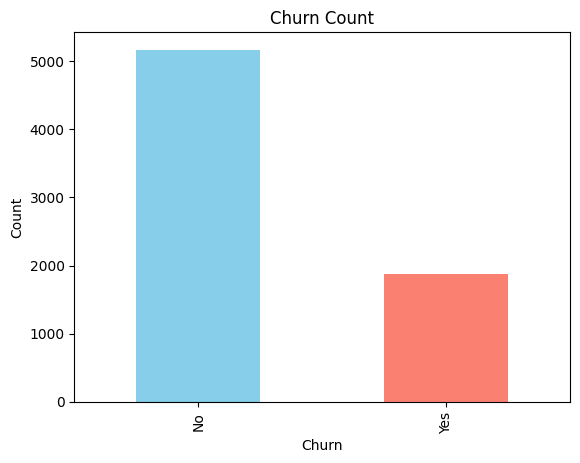

In [23]:
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

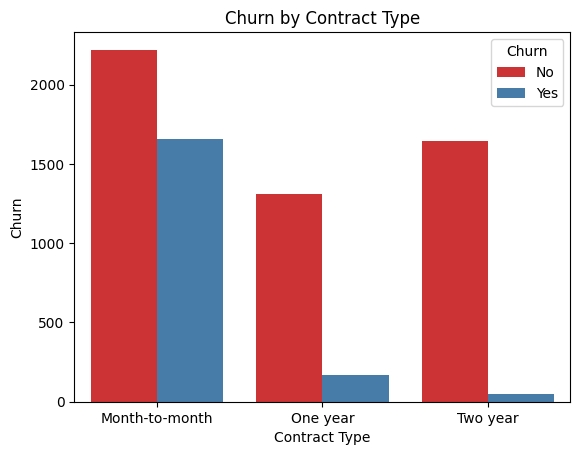

In [24]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn')
plt.show()

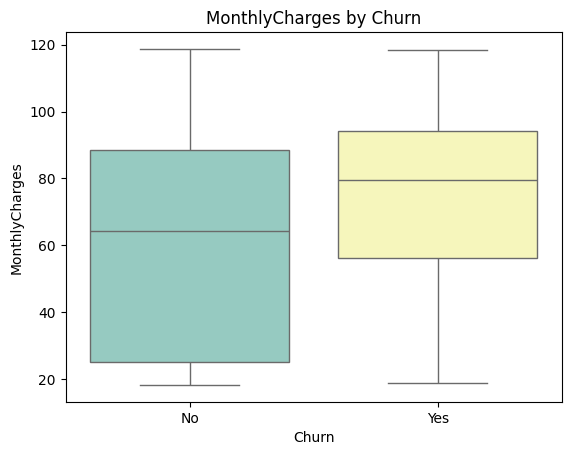

In [25]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', palette='Set3')
plt.title('MonthlyCharges by Churn')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22544\217451056.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tenure_churn=df.groupby('Tenure_group')['Churn'].value_counts(normalize=True).unstack()


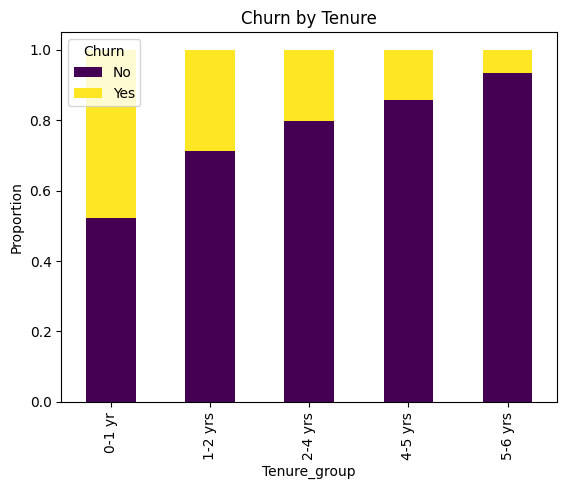

In [26]:
df['Tenure_group']=pd.cut(df['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-1 yr', '1-2 yrs', '2-4 yrs', '4-5 yrs', '5-6 yrs'])
tenure_churn=df.groupby('Tenure_group')['Churn'].value_counts(normalize=True).unstack()
tenure_churn.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Churn by Tenure")
plt.ylabel("Proportion")
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_22544\1144753955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


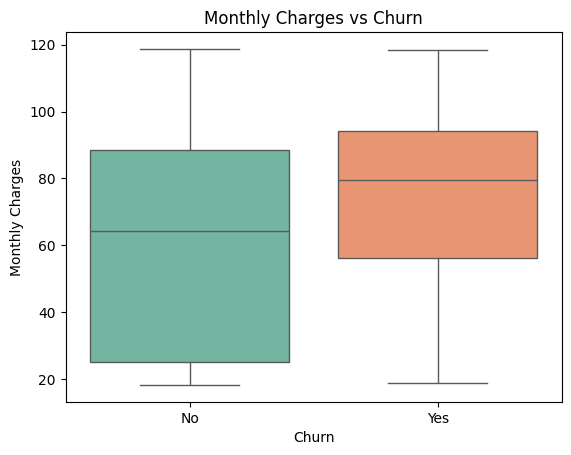

In [27]:
df['Churn_Binary']=df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Monthly Charges vs Churn')
plt.ylabel('Monthly Charges')
plt.show()

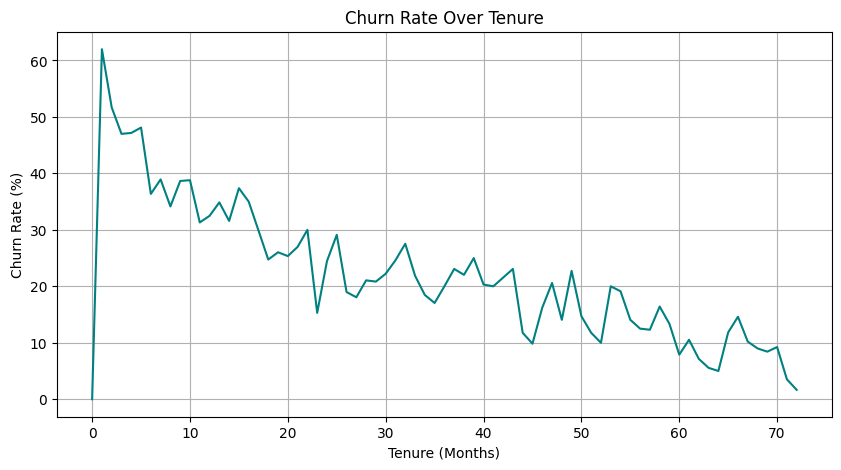

In [28]:
tenure_churn=df.groupby('tenure')['Churn'].apply(lambda x:(x=='Yes').mean()*100)
plt.figure(figsize=(10,5))
plt.plot(tenure_churn.index, tenure_churn.values, color='teal')
plt.title('Churn Rate Over Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Churn Rate (%)')
plt.grid(True)
plt.show()

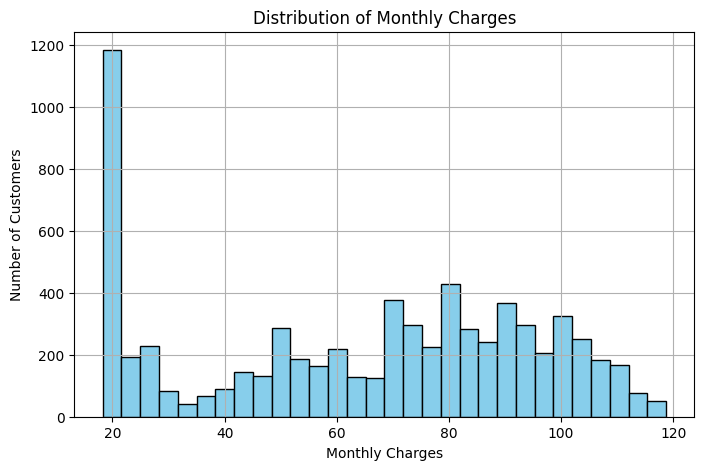

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

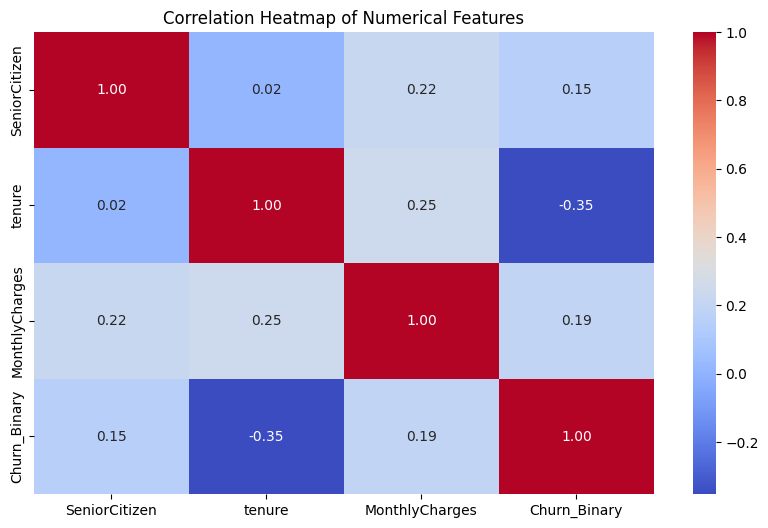

In [30]:
num_df=df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

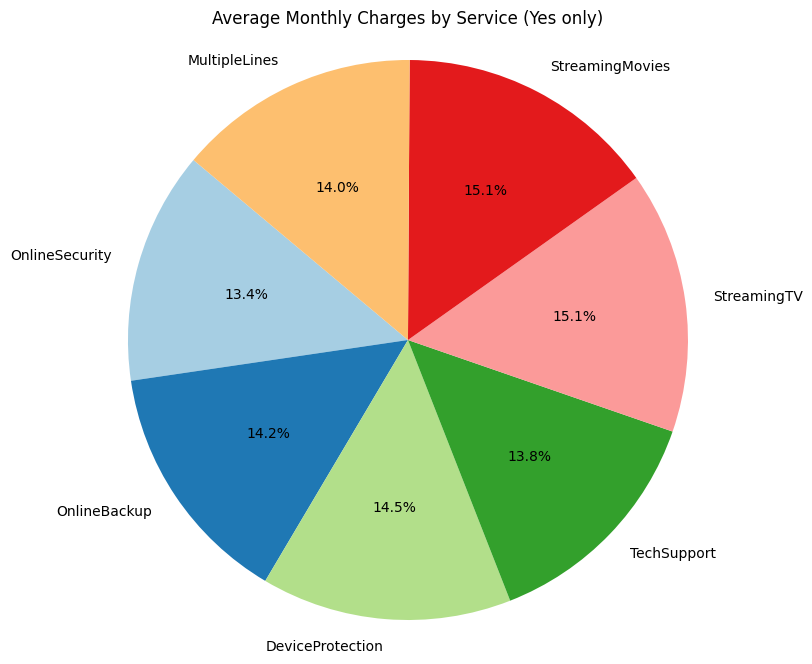

In [31]:
import numpy as np
service_columns=[
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]
avg_costs={}
for col in service_columns:
    avg_charge=df[df[col]=='Yes']['MonthlyCharges'].mean()
    if not np.isnan(avg_charge): 
        avg_costs[col]=avg_charge
plt.figure(figsize=(10, 8))
plt.pie(x=list(avg_costs.values()), labels=list(avg_costs.keys()), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Average Monthly Charges by Service (Yes only)')
plt.axis('equal')  
plt.show()

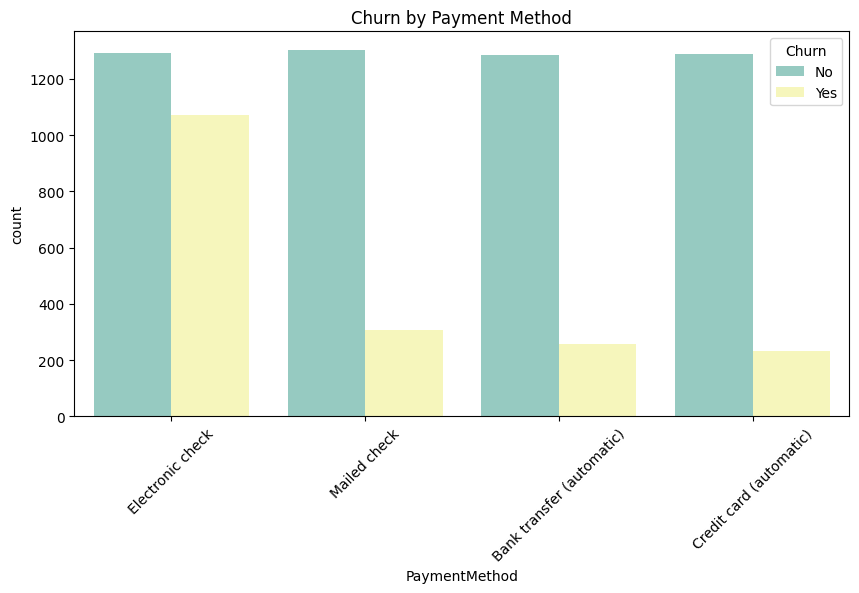

In [32]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='Set3')
plt.xticks(rotation=45)
plt.title('Churn by Payment Method')
plt.show()

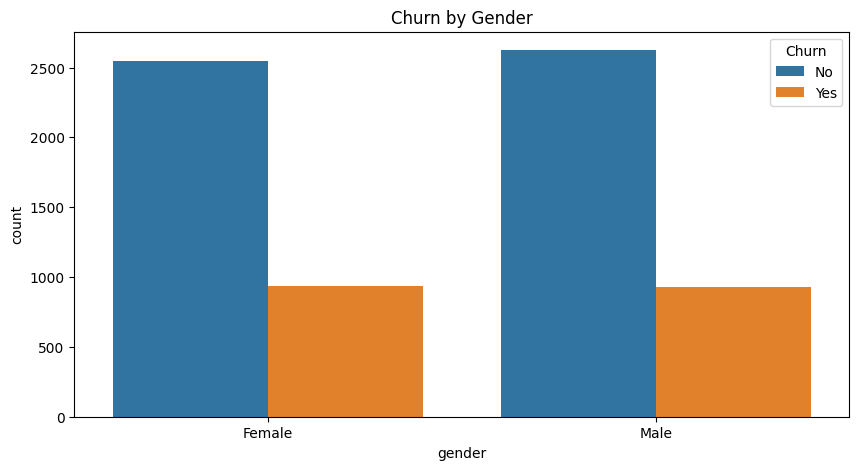

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.show()

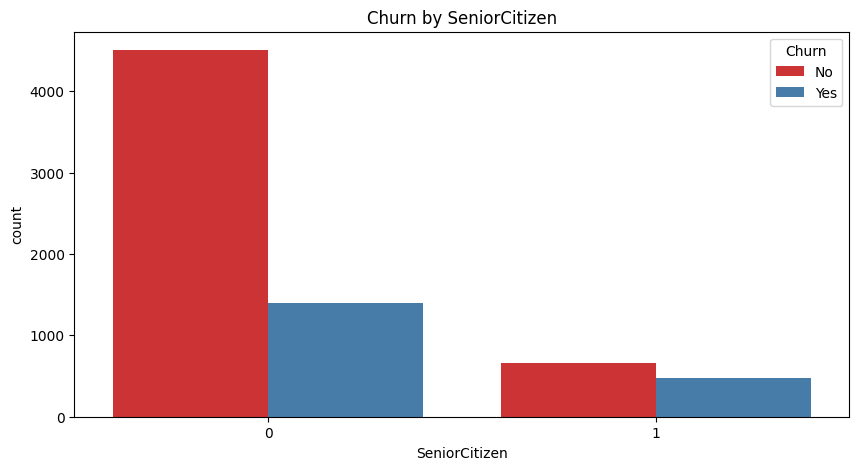

In [34]:
plt.figure(figsize=(10, 5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='Set1')
plt.title('Churn by SeniorCitizen')
plt.show()

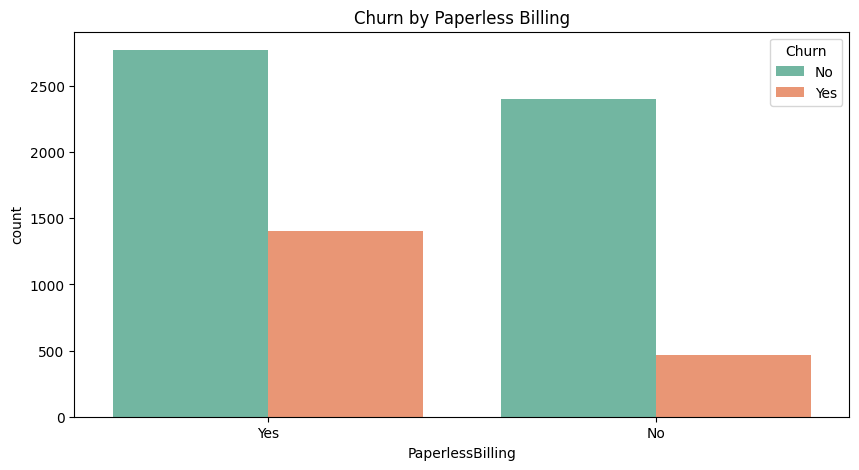

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Paperless Billing')
plt.show()

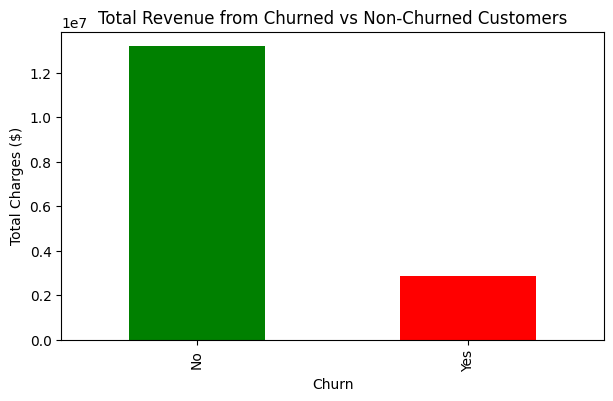

In [36]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df_clean=df.dropna(subset=['TotalCharges'])
df.groupby('Churn')['TotalCharges'].sum().plot(kind='bar', figsize=(7, 4), color=['green', 'red'])
plt.title('Total Revenue from Churned vs Non-Churned Customers')
plt.ylabel('Total Charges ($)')
plt.show()